# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **Summary - NLP Biomedical Research<br>BiLSTM CRF Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# **BILSTM-CRF Model Architecture**

<center>

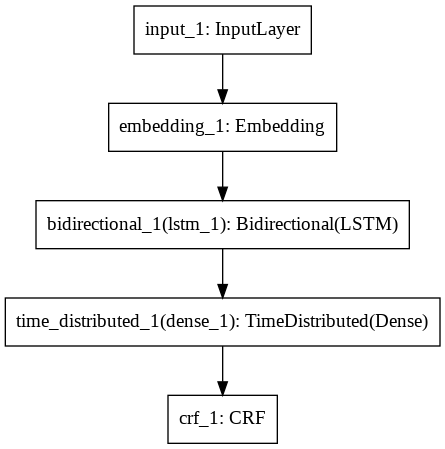

</center>

# **Connect Google Drive Storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **NER Files**

In [ ]:
! ls /content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/*.ipynb

/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/BiLSTM-CRF.ipynb
/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/Dataset.ipynb
/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/Dokumentasi.ipynb
/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/Preprocessing.ipynb


# **Model Output**

In [ ]:
! ls -lh /content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/output

total 1.7M
-rw------- 1 root root 1.6M Jun 26 01:09 model.h5
-rw------- 1 root root  15K Jun 26 01:05 model.png
-rw------- 1 root root   60 Jun 26 01:14 tag_to_index.pickle
-rw------- 1 root root  61K Jun 26 01:14 word_to_index.pickle


In [ ]:
import pandas as pd
import numpy as np

# **NER Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/input/ner_dataset.csv")
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 0,studies,NNS,O
1,Sentence: 0,on,IN,O
2,Sentence: 0,magnesium,NN,O
3,Sentence: 0,s,NN,O
4,Sentence: 0,mechanism,NN,O
5,Sentence: 0,of,IN,O
6,Sentence: 0,action,NN,O
7,Sentence: 0,in,IN,O
8,Sentence: 0,digitalis,NN,plant
9,Sentence: 0,induced,VBD,O


In [ ]:
df.shape

(38205, 4)

In [ ]:
df['Tag'].unique()

array(['O', 'plant', 'disease'], dtype=object)

In [ ]:
print("Entities:\n")
print(f"Total O: {len(df.loc[df['Tag'] == 'O', 'Word'])}")
print(f"Total Plant: {len(df.loc[df['Tag'] == 'plant', 'Word'])}")
print(f"Total Disease: {len(df.loc[df['Tag'] == 'disease', 'Word'])}")

Entities:

Total O: 32002
Total Plant: 2644
Total Disease: 3559


## **Visualisasi Entitas**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


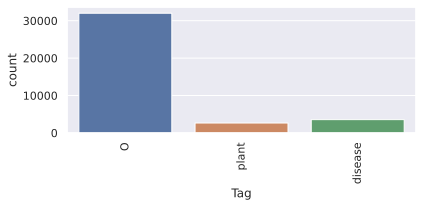

In [ ]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **POS Tagging List**

```
CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
```

In [ ]:
df['POS'].unique()

array(['NNS', 'IN', 'NN', 'VBD', 'DT', 'WDT', 'VBZ', 'RB', 'JJ', 'VBN',
       'CC', 'MD', 'VB', 'PRP$', 'CD', 'VBP', 'VBG', 'TO', 'EX', 'PRP',
       'WP', 'JJR', 'RBR', 'WRB', 'RP', 'JJS', 'FW', 'WP$', 'RBS', 'PDT',
       '$', 'NNP'], dtype=object)

## **Visualisasi Pos Tagging**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


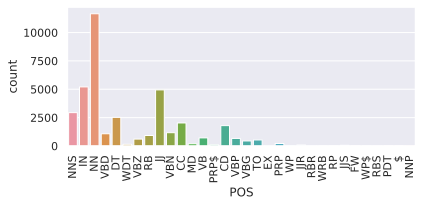

In [ ]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
BiLSTM_CRF_Report = pd.read_excel("/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/BiLSTM-CRF_Report.xlsx").fillna("")

# **UJI 1 - Summary NER**

In [ ]:
BiLSTM_CRF_Report

,Averages,Entities,Precision,Recall,F-1 Scores
0,Micro,PAD,1.0,1.0,1.0
1,Micro,O,0.970007,0.956699,0.963307
2,Micro,plant,0.988494,0.988494,0.988494
3,Micro,disease,0.988494,0.988494,0.988494
4,,,,,
5,Macro,PAD,1.0,1.0,1.0
6,Macro,O,0.970007,0.956699,0.963307
7,Macro,plant,0.900164,0.91704,0.907448
8,Macro,disease,0.900164,0.91704,0.907448
9,,,,,
